In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from math import sqrt
import shap

In [2]:
pd.options.display.max_columns = None 
pd.options.display.max_rows = None 

In [3]:
iphone12_df = pd.read_csv('/data/p_dsi/teams2023/team2/asurion_data/iPhone12_Final.csv', parse_dates=['weeks_monday','month_year'])
iphone13_df = pd.read_csv('/data/p_dsi/teams2023/team2/asurion_data/iPhone13_Final.csv', parse_dates=['weeks_monday','month_year'])
iphone14_df = pd.read_csv('/data/p_dsi/teams2023/team2/asurion_data/iPhone14_Final.csv', parse_dates=['weeks_monday','month_year'])
iphone_df = pd.read_csv('/data/p_dsi/teams2023/team2/asurion_data/time_series_ML_features_final.csv', parse_dates=['weeks_monday','month_year'])

In [4]:
iphone10 = iphone_df[(iphone_df['phone_model'] == 'apple iphone x')]
iphone11 = iphone_df[(iphone_df['phone_model'] == 'apple iphone 11')]
iphone12 = iphone_df[(iphone_df['phone_model'] == 'apple iphone 12')]
iphone13 = iphone_df[(iphone_df['phone_model'] == 'apple iphone 13')]
iphone14 = iphone_df[(iphone_df['phone_model'] == 'apple iphone 14')]

In [5]:
iphone13_df

,days_since_release_date,weeks_monday,month,year,month_year,holiday,this_week,avg_claim_this_month,avg_claim_last_month,1_week_ago,2_week_ago,3_week_ago,4_week_ago
0,50,2021-12-13,12,2021,2021-12-01,0,10,8.25,3.666667,2.0,6.0,3.0,2.0
1,57,2021-12-20,12,2021,2021-12-01,1,6,8.25,3.666667,10.0,2.0,6.0,3.0
2,64,2021-12-27,12,2021,2021-12-01,0,15,8.25,3.666667,6.0,10.0,2.0,6.0
3,71,2022-01-03,1,2022,2022-01-01,0,7,10.60,8.250000,15.0,6.0,10.0,2.0
4,78,2022-01-10,1,2022,2022-01-01,0,13,10.60,8.250000,7.0,15.0,6.0,10.0
5,85,2022-01-17,1,2022,2022-01-01,0,10,10.60,8.250000,13.0,7.0,15.0,6.0
6,92,2022-01-24,1,2022,2022-01-01,0,11,10.60,8.250000,10.0,13.0,7.0,15.0
7,99,2022-01-31,1,2022,2022-01-01,0,12,10.60,8.250000,11.0,10.0,13.0,7.0
8,106,2022-02-07,2,2022,2022-02-01,0,15,23.00,10.600000,12.0,11.0,10.0,13.0
9,113,2022-02-14,2,2022,2022-02-01,0,23,23.00,10.600000,15.0,12.0,11.0,10.0


In [49]:
iphone14

,phone_model,weeks_monday,month,year,month_year,days_since_release_date,claim
262,apple iphone 14,2022-11-14,11,2022,2022-11-01,59,9
267,apple iphone 14,2022-11-21,11,2022,2022-11-01,66,30
271,apple iphone 14,2022-11-28,11,2022,2022-11-01,73,23
277,apple iphone 14,2022-12-05,12,2022,2022-12-01,80,43
283,apple iphone 14,2022-12-12,12,2022,2022-12-01,87,32
289,apple iphone 14,2022-12-19,12,2022,2022-12-01,94,36
292,apple iphone 14,2022-12-26,12,2022,2022-12-01,101,44
299,apple iphone 14,2023-01-02,1,2023,2023-01-01,108,45
303,apple iphone 14,2023-01-09,1,2023,2023-01-01,115,59
308,apple iphone 14,2023-01-16,1,2023,2023-01-01,122,60


In [6]:
iphone13

,phone_model,weeks_monday,month,year,month_year,days_since_release_date,claim
54,apple iphone 13,2021-11-15,11,2021,2021-11-01,22,2
60,apple iphone 13,2021-11-22,11,2021,2021-11-01,29,3
64,apple iphone 13,2021-11-29,11,2021,2021-11-01,36,6
66,apple iphone 13,2021-12-06,12,2021,2021-12-01,43,2
69,apple iphone 13,2021-12-13,12,2021,2021-12-01,50,10
76,apple iphone 13,2021-12-20,12,2021,2021-12-01,57,6
77,apple iphone 13,2021-12-27,12,2021,2021-12-01,64,15
83,apple iphone 13,2022-01-03,1,2022,2022-01-01,71,7
85,apple iphone 13,2022-01-10,1,2022,2022-01-01,78,13
89,apple iphone 13,2022-01-17,1,2022,2022-01-01,85,10


In [8]:
iphone12

,phone_model,weeks_monday,month,year,month_year,days_since_release_date,claim
9,apple iphone 12,2021-08-02,8,2021,2021-08-01,283,69
12,apple iphone 12,2021-08-09,8,2021,2021-08-01,290,219
15,apple iphone 12,2021-08-16,8,2021,2021-08-01,297,224
18,apple iphone 12,2021-08-23,8,2021,2021-08-01,304,292
21,apple iphone 12,2021-08-30,8,2021,2021-08-01,311,274
25,apple iphone 12,2021-09-06,9,2021,2021-09-01,318,252
26,apple iphone 12,2021-09-13,9,2021,2021-09-01,325,266
29,apple iphone 12,2021-09-20,9,2021,2021-09-01,332,293
32,apple iphone 12,2021-09-27,9,2021,2021-09-01,339,324
36,apple iphone 12,2021-10-04,10,2021,2021-10-01,346,377


In [21]:
new_iphone12 = iphone12.copy()
new_iphone12['days_since_release_date'] = iphone12['days_since_release_date'] - 114
new_iphone12['weeks_monday'] = iphone12['weeks_monday'] - pd.Timedelta(days=113)
new_iphone12['month'] = new_iphone12['weeks_monday'].dt.month
new_iphone12['year'] = new_iphone12['weeks_monday'].dt.year
new_iphone12.drop('month_year', axis=1, inplace=True)
new_iphone12

,phone_model,weeks_monday,month,year,days_since_release_date,claim
9,apple iphone 12,2021-04-11,4,2021,169,69
12,apple iphone 12,2021-04-18,4,2021,176,219
15,apple iphone 12,2021-04-25,4,2021,183,224
18,apple iphone 12,2021-05-02,5,2021,190,292
21,apple iphone 12,2021-05-09,5,2021,197,274
25,apple iphone 12,2021-05-16,5,2021,204,252
26,apple iphone 12,2021-05-23,5,2021,211,266
29,apple iphone 12,2021-05-30,5,2021,218,293
32,apple iphone 12,2021-06-06,6,2021,225,324
36,apple iphone 12,2021-06-13,6,2021,232,377


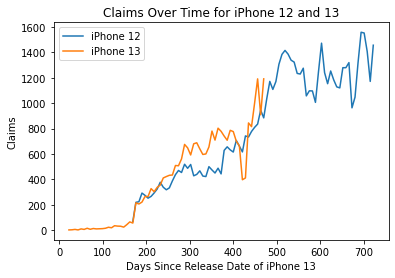

In [23]:
plt.plot(new_iphone12['days_since_release_date'], new_iphone12['claim'], label='iPhone 12')
plt.plot(iphone13['days_since_release_date'], iphone13['claim'], label='iPhone 13')

plt.xlabel('Days Since Release Date of iPhone 13')
plt.ylabel('Claims')
plt.title('Claims Over Time for iPhone 12 and 13')
plt.legend()
plt.show()

In [26]:
iphone12_overlap_13 = new_iphone12[(new_iphone12['days_since_release_date'] >= 169) & (new_iphone12['days_since_release_date'] <= 400)].reset_index()
iphone13_overlap_12 = iphone13[(iphone13['days_since_release_date'] >= 169) & (iphone13['days_since_release_date'] <= 400)].reset_index()
growth_perc = ((iphone13_overlap_12['claim'] - iphone12_overlap_13['claim']) / iphone12_overlap_13['claim']) * 100
avg_growth_perc = growth_perc.mean()
print("On average, iphone 13 has", round(avg_growth_perc, 3), "% more claims than iphone 12.")
avg_growth_decimal = avg_growth_perc * 0.01

diff = iphone13_overlap_12['claim'] - iphone12_overlap_13['claim']
avg_diff = np.mean(diff)
print("On average, iphone 13 has", round(avg_diff, 3), "more claims than iphone 12.")

On average, iphone 13 has 23.508 % more claims than iphone 12.
On average, iphone 13 has 110.647 more claims than iphone 12.


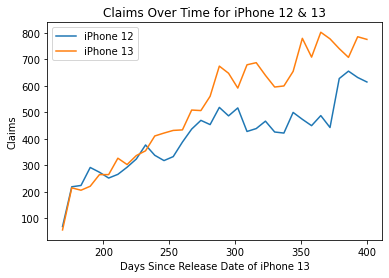

In [27]:
plt.plot(iphone12_overlap_13['days_since_release_date'], iphone12_overlap_13['claim'], label='iPhone 12')
plt.plot(iphone13_overlap_12['days_since_release_date'], iphone13_overlap_12['claim'], label='iPhone 13')

plt.xlabel('Days Since Release Date of iPhone 13')
plt.ylabel('Claims') 
plt.title('Claims Over Time for iPhone 12 & 13')
plt.legend()
plt.show()

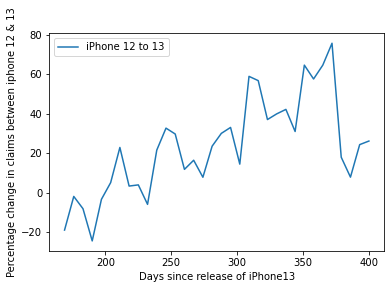

In [28]:
pct_change_12_13 = (iphone13_overlap_12['claim'] - iphone12_overlap_13['claim']) / iphone12_overlap_13['claim'] * 100
plt.plot(iphone12_overlap_13['days_since_release_date'], pct_change_12_13, label='iPhone 12 to 13')
plt.legend()
plt.xlabel('Days since release of iPhone13')
plt.ylabel('Percentage change in claims between iphone 12 & 13')
plt.show()

In [47]:
iphone12_avg_claim_per_month = iphone12_overlap_13.groupby('month')['claim'].mean().reset_index()
iphone13_avg_claim_per_month = iphone13_overlap_12.groupby('month')['claim'].mean().reset_index()
merged_df = pd.merge(iphone12_avg_claim_per_month, iphone13_avg_claim_per_month, on='month', suffixes=('_12', '_13'))
merged_df['growth_rate'] = (merged_df['claim_13'] - merged_df['claim_12']) / merged_df['claim_12'] * 100
merged_df

,month,claim_12,claim_13,growth_rate
0,4,170.666667,159.00,-6.835937
1,5,275.400000,276.20,0.290487
2,6,339.250000,381.25,12.380251
3,7,407.000000,470.50,15.601966
4,8,481.000000,631.20,31.226611
5,9,438.500000,631.00,43.899658
6,10,471.000000,745.00,58.174098
7,11,632.750000,752.75,18.964836


In [48]:
merged_df['growth_rate'].mean()

21.712746008592298

In [55]:
iphone13_overlap_14 = iphone13[(iphone13['days_since_release_date'] <= 99)].reset_index()

In [56]:
iphone13_overlap_14 

,index,phone_model,weeks_monday,month,year,month_year,days_since_release_date,claim
0,54,apple iphone 13,2021-11-15,11,2021,2021-11-01,22,2
1,60,apple iphone 13,2021-11-22,11,2021,2021-11-01,29,3
2,64,apple iphone 13,2021-11-29,11,2021,2021-11-01,36,6
3,66,apple iphone 13,2021-12-06,12,2021,2021-12-01,43,2
4,69,apple iphone 13,2021-12-13,12,2021,2021-12-01,50,10
5,76,apple iphone 13,2021-12-20,12,2021,2021-12-01,57,6
6,77,apple iphone 13,2021-12-27,12,2021,2021-12-01,64,15
7,83,apple iphone 13,2022-01-03,1,2022,2022-01-01,71,7
8,85,apple iphone 13,2022-01-10,1,2022,2022-01-01,78,13
9,89,apple iphone 13,2022-01-17,1,2022,2022-01-01,85,10


In [57]:
iphone14 = iphone14.drop(index=iphone14.index[-1]).reset_index(drop=True)
iphone14 

,phone_model,weeks_monday,month,year,month_year,days_since_release_date,claim
0,apple iphone 14,2022-11-14,11,2022,2022-11-01,59,9
1,apple iphone 14,2022-11-21,11,2022,2022-11-01,66,30
2,apple iphone 14,2022-11-28,11,2022,2022-11-01,73,23
3,apple iphone 14,2022-12-05,12,2022,2022-12-01,80,43
4,apple iphone 14,2022-12-12,12,2022,2022-12-01,87,32
5,apple iphone 14,2022-12-19,12,2022,2022-12-01,94,36
6,apple iphone 14,2022-12-26,12,2022,2022-12-01,101,44
7,apple iphone 14,2023-01-02,1,2023,2023-01-01,108,45
8,apple iphone 14,2023-01-09,1,2023,2023-01-01,115,59
9,apple iphone 14,2023-01-16,1,2023,2023-01-01,122,60


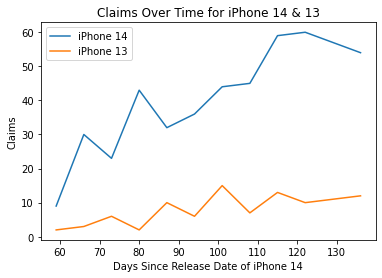

In [62]:
plt.plot(iphone14['days_since_release_date'], iphone14['claim'], label='iPhone 14')
plt.plot(iphone14['days_since_release_date'], iphone13_overlap_14['claim'], label='iPhone 13')

plt.xlabel('Days Since Release Date of iPhone 14')
plt.ylabel('Claims')  
plt.title('Claims Over Time for iPhone 14 & 13')
plt.legend()
plt.show()

In [59]:
iphone14_avg_claim_per_month = iphone14 .groupby('month')['claim'].mean().reset_index()
iphone14_avg_claim_per_month

,month,claim
0,1,55.000000
1,11,20.666667
2,12,38.750000


In [60]:
iphone13_avg_claim_per_month = iphone13_overlap_14.groupby('month')['claim'].mean().reset_index()
iphone13_avg_claim_per_month

,month,claim
0,1,10.600000
1,11,3.666667
2,12,8.250000


In [63]:
merged_df = pd.merge(iphone14_avg_claim_per_month, iphone13_avg_claim_per_month, on='month', suffixes=('_14', '_13'))
merged_df['diff'] = merged_df['claim_14'] - merged_df['claim_13']
diff_by_month = merged_df[['month', 'diff']]
diff_by_month

,month,diff
0,1,44.4
1,11,17.0
2,12,30.5
